<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Изучение-времени-продаж-квартир." data-toc-modified-id="Изучение-времени-продаж-квартир.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продаж квартир.</a></span></li><li><span><a href="#Удаление-аномальных-данных-(выбросов)" data-toc-modified-id="Удаление-аномальных-данных-(выбросов)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Удаление аномальных данных (выбросов)</a></span></li><li><span><a href="#Изучим-факторы,-влияющие-на-стоимость-квартир" data-toc-modified-id="Изучим-факторы,-влияющие-на-стоимость-квартир-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучим факторы, влияющие на стоимость квартир</a></span></li><li><span><a href="#Анализ-цены-за-кв.м.-по-населённым-пунктам" data-toc-modified-id="Анализ-цены-за-кв.м.-по-населённым-пунктам-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ цены за кв.м. по населённым пунктам</a></span></li><li><span><a href="#Изучение-объявлений-по-объектам-в-центре-Санкт-Петербурга" data-toc-modified-id="Изучение-объявлений-по-объектам-в-центре-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучение объявлений по объектам в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Для начала ознакомимся с общей информацией о датасете: количеством столбцов и строк, наименованием столбцов и типами данных в них, с конкретными данными датасета.   

Импортируем необходимые библиоткеи и модули: 

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 8)})
import warnings
warnings.filterwarnings('ignore')
import statistics as std

Сохраним анализируемый датафрейм в переменной *df*:

In [10]:
df = pd.read_csv(r'C:\Users\USER\Desktop\DA\real_estate_data.csv', sep="\t")

Ознакомимся с общей информацией о таблице и данными в ней с помощью метода `info()`:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем первые 5 строк таблицы с помощью метода `head()`, чтобы ознакомиться какие данные содержатся в ней:

In [12]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Как видим, в данных имеются пропуски, а типы некоторых данных следует изменить. Следовательно, данные необходимо подготовить для анализа.

Столбцы датасета имеют корректные наименования за исключением столбца *cityCenters_nearest*.   
Поэтому переименуем столбец *cityCenters_nearest* в *city_center_nearest* и проверим удалось ли переименовать столбец путём вызова метода `columns`:

In [13]:
df.rename(columns={'cityCenters_nearest':'city_center_nearest'}, inplace=True)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Вывод

Данные, содержащиеся в датафрейме, являются достаточными для проведения исследования. Однако ознакомление с конкретными данными позволило выявить недостатки в данных, устранение которых будет проведено на этапе предобработки данных.

## Предобработка данных

Посчитаем количество пропусков в каждом столбце датасета путём применения методов `isna()` и `sum()`:

In [14]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_center_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски обнаружены во многих столбцах. Рассчитаем процент пропущенных значений в соответствующих столбцах с помощью цикла:

In [15]:
# Создадим цикл for с переменной col, а в качестве данных, по которым будет проходить цикла укажем столбцы,
# в которых обнаружены пропущенные значения. Сохраним в переменной missing примнение функции np.mean, которая 
# посчитает количество пропущенных значений в столбце и разделит его на общее количество значений в столбце. 
# Результат выведем на экран в виде "столбец - процент пропущенных данных в нём",применив функцию format.

for col in df[[
    'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name',
    'airports_nearest', 'city_center_nearest', 'parks_around3000', 'parks_nearest', 
    'ponds_around3000', 'ponds_nearest', 'days_exposition'
]]:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

ceiling_height - 39%
floors_total - 0%
living_area - 8%
is_apartment - 88%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
city_center_nearest - 23%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


Таким образом, в некоторых столбцах пропуски составляют более 60% от всех процентов, но для большинства столбцов с пропусками это значение не превышает 23%.
Проведём работу по устранению пропусков в данных.

Предположим, что в столбце *balcony* пропуски допущены по квартирам, где отсутствуют балконы, поэтому заполним пропуски 0:

In [16]:
print('Количество пропусков в столбце balcony до:', df['balcony'].isna().sum())
df.loc[df['balcony'].isna(), 'balcony'] = 0
print('Количество пропусков в столбце balcony после:', df['balcony'].isna().sum())

Количество пропусков в столбце balcony до: 11519
Количество пропусков в столбце balcony после: 0


Также допустим, что значения по значению *is_apartment* допущены в отношении квартир, а не апартаментов, поэтому заполним пропуски 0:

In [17]:
print('Количество пропусков в столбце is_apartment до:', df['is_apartment'].isna().sum())
df.loc[df['is_apartment'].isna(), 'is_apartment'] = 0
print('Количество пропусков в столбце is_apartment после:', df['is_apartment'].isna().sum())

Количество пропусков в столбце is_apartment до: 20924
Количество пропусков в столбце is_apartment после: 0


Заполним пропуски в столбцах *ceiling_height*, *living_area*, *kitchen_area* медианными значениями по указанным столбцам:

In [18]:
print('Количество пропусков в столбце ceiling_height до:', df['ceiling_height'].isna().sum())
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()
print('Количество пропусков в столбце ceiling_height после:', df['ceiling_height'].isna().sum())

print()

print('Количество пропусков в столбце living_area до:', df['living_area'].isna().sum())
df.loc[df['living_area'].isna(), 'living_area'] = df['living_area'].median()
print('Количество пропусков в столбце living_area после:', df['living_area'].isna().sum())

print()

print('Количество пропусков в столбце kitchen_area до:', df['kitchen_area'].isna().sum())
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['kitchen_area'].median()
print('Количество пропусков в столбце kitchen_area после:', df['kitchen_area'].isna().sum())

Количество пропусков в столбце ceiling_height до: 9195
Количество пропусков в столбце ceiling_height после: 0

Количество пропусков в столбце living_area до: 1903
Количество пропусков в столбце living_area после: 0

Количество пропусков в столбце kitchen_area до: 2278
Количество пропусков в столбце kitchen_area после: 0


Пропуски в столбце *airports_nearest* заполним медианой для соответствующего населённого пункта (столбец *locality_name*), а по населённым пунктам, в отношении которых информация о расстоянии до аэропорта отсутствует вовсе, заполним пропущенные данные медианой по всей Ленинградской области:

In [19]:
print('Количество пропусков в столбце airports_nearest до:', df['airports_nearest'].isna().sum())
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name,'airports_nearest'].median()
    df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == locality_name), 'airports_nearest'] = median


df.loc[df['airports_nearest'].isna(), 'airports_nearest'] = df['airports_nearest'].median()
print('Количество пропусков в столбце airports_nearest после:', df['airports_nearest'].isna().sum())

Количество пропусков в столбце airports_nearest до: 5542
Количество пропусков в столбце airports_nearest после: 0


Аналогичным образом заполним пропуски в столбце *city_center_nearest*:

In [20]:
print('Количество пропусков в столбце city_center_nearest до:', df['city_center_nearest'].isna().sum())
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name,'city_center_nearest'].median()
    df.loc[(df['city_center_nearest'].isna()) & (df['locality_name'] == locality_name), 'city_center_nearest'] = median

df.loc[df['city_center_nearest'].isna(), 'city_center_nearest'] = df['city_center_nearest'].median()
print('Количество пропусков в столбце city_center_nearest после:', df['city_center_nearest'].isna().sum())

Количество пропусков в столбце city_center_nearest до: 5519
Количество пропусков в столбце city_center_nearest после: 0


Удалим пропуски в столбцах *locality_name* и *floors_total*, т.к. количество пропусков небольшое:

In [21]:
print(df.shape[0])
df = df.dropna(subset=['locality_name'])
print(df.shape[0])

23699
23650


In [22]:
print(df.shape[0])
df = df.dropna(subset=['floors_total'])
print(df.shape[0])

23650
23565


Предположим, что пропуски в столбце *days_exposition* указывают на объявления, которые еще не сняты с публикации на момент выгрузки данных. Будем считать, что дата выгрузки данных равна последнему дню наблюдений (max), поэтому от этого дня высчитаем разницу с первым днём публикации объявления для заполнения пропусков. Но для начала изменим формат данных в столбце.

In [23]:
# Изменим формат в столбце first_day_exposition с помощью метода to_datetime():
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

print('Количество пропусков в столбце days_exposition до:', df['days_exposition'].isna().sum())
df.loc[df['days_exposition'].isna(),'days_exposition'] = (df['first_day_exposition'].max() 
                                                          - df.loc[df['days_exposition'].isna(), 'first_day_exposition']).dt.days
print('Количество пропусков в столбце days_exposition после:', df['days_exposition'].isna().sum())

Количество пропусков в столбце days_exposition до: 3171
Количество пропусков в столбце days_exposition после: 0


Заменим тип данных в столбце *floors_total* на целочисленный:

In [24]:
df['floors_total'] = df['floors_total'].astype(int)
df['floors_total'].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            23689, 23690, 23691, 23692, 23693, 23694, 23695, 23696, 23697,
            23698],
           dtype='int64', length=23565)

Посчитаем количество дубликатов, т.е. полностью одинаковых строк, с помощью методов `duplicated()` и `sum()`:

In [25]:
print(f'Количество дубликатов в датасете: {df.duplicated().sum()}')

Количество дубликатов в датасете: 0


### Вывод

Пропущенные значения в исходном датасете были обнаружены во многих столбцах, что могло бы повлиять на результат исследования.  
Отсутствующие значения были заменены наиболее подходящим образом (заполнены нулями, медианными значениями или удалены вовсе). В итоге пропущенные данные были заполнены.    
Кроме того, были заменены типы данных в столбцах *first_day_exposition* и *floors_total*.

## Расчёты и добавление результатов в таблицу

Добавим в датафрейм с помощью метода `assign` новые столбцы:
* *price_per_sqm* - значение цены за квадратный метр (как частное *last_price* и *total_area*);
* *living_to_total* - соотношение жилой площади объекта к общей площади;
* *kitchen_to_total* - соотношение площади кухни к общей площади объекта.   

Данные в столбце *price_per_sqm* приведём к типу `int`.

In [26]:
df = df.assign(
    price_per_sqm=df['last_price'] / df['total_area'],
    living_to_total=df['living_area'] / df['total_area'],
    kitchen_to_total=df['kitchen_area'] / df['total_area']
    )
df['price_per_sqm'] = df['price_per_sqm'].astype(float)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,living_to_total,kitchen_to_total
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,0,...,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,57.00,"120,370.37",0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,0,...,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,0,...,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,30.00,9,0,...,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",0.19,0.06
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,0,...,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",0.32,0.41


Добавим в таблицу столбцы *year*, *month*, *day*, которые будут содержать данные о соответствующем годе, месяце и дне публикации объявления. Установим в качестве типа данных `int`:

In [27]:
df['year'] = df['first_day_exposition'].dt.year.astype(int)
df['month'] = df['first_day_exposition'].dt.month.astype(int)
df['day'] = df['first_day_exposition'].dt.day.astype(int)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,living_to_total,kitchen_to_total,year,month,day
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,0,...,482.00,2.00,755.00,57.00,"120,370.37",0.47,0.23,2019,3,7
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,0,...,NaN,0.00,NaN,81.00,"82,920.79",0.46,0.27,2018,12,4
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,0,...,90.00,2.00,574.00,558.00,"92,785.71",0.61,0.15,2015,8,20
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,30.00,9,0,...,84.00,3.00,234.00,424.00,"408,176.10",0.19,0.06,2015,7,24
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,0,...,112.00,1.00,48.00,121.00,"100,000.00",0.32,0.41,2018,6,19


Произведём категоризацию данных об этажах, на которых расположены объекты с выделением следующих категорий:
* *первый*
* *последний*
* *другой*

In [28]:
# Аругментом функции будет строка датасета, значения которой будут влиять на то к какой категории будет отнесён
# этаж. В качестве переменных floors_total и floor будут выступать значения из одноимённых столбцов.
# В теле функции с помощью условных конструкций определим к какой категории относится конкретный этаж.
def floor_group(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif (floor != 1) & (floor < floors_total):
        return 'другой'
    elif floor == floors_total:
        return 'последний'

# Применим функцию к датасету и выведем на экран результат. 
df['floor_type'] = df.apply(floor_group, axis=1)
display(df[['floor', 'floors_total', 'floor_type']].head())

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой


### Вывод

В датафрейм были добавлены дополнительные данные, которые были расчитаны исходя из уже имеющихся данных, а также проведена категоризация данных об этажах, на котором расположены объекты.

## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков

 Изучим такие параметры объявлений как: площадь, цена, число комнат, высота потолков.    
 Для начала с помощью методa `describe()` ознакомимся с общими статистическими показателями:

In [29]:
df[['total_area', 'rooms', 'ceiling_height', 'days_exposition', 'price_per_sqm']].describe()

,total_area,rooms,ceiling_height,days_exposition,price_per_sqm
count,"23,565.00","23,565.00","23,565.00","23,565.00","23,565.00"
mean,60.32,2.07,2.72,185.76,"99,405.84"
std,35.66,1.08,0.99,233.49,"50,389.43"
min,12.00,0.00,1.00,0.00,111.83
25%,40.00,1.00,2.60,43.00,"76,566.13"
50%,52.00,2.00,2.65,94.00,"95,000.00"
75%,69.70,3.00,2.70,237.00,"114,213.20"
max,900.00,19.00,100.00,"1,618.00","1,907,500.00"


Видим, что медиана и среднее сильно отличаются для данных об общей площади, днях размещения объявлений.
Стандартное отклонение только для данных о высоте потолков и количестве комнат близко к нулю, для остальных анализируемых данных станадартное отклонение говорит о высокой вариабельности значений в выборке.

Рассчитаем коэффициент ассиметрии с помощью метода `skew()`:

In [30]:
df[['total_area', 'rooms', 'ceiling_height', 'days_exposition', 'price_per_sqm']].skew()

total_area         4.78
rooms              1.53
ceiling_height    53.03
days_exposition    2.45
price_per_sqm      8.08
dtype: float64

Таким образом, все данные, кроме тех, что содержатся в столбце *rooms*, сильно ассиметричны. При этом ассиметрия является положительной, т.е. в анализируемых данных среднее больше медианы, в чём мы уже убедились.    

Визулизируем наши выводы, создадим функцию, которая будет возвращать гистограмму:

In [31]:
def column_visible_first(df, column, bins, suptitle, xlabel, ylabel):

    plt.figure(figsize=(16,5)) # размер фигуры
    plt.suptitle(suptitle + ' [' + column + ']', fontsize=16) # название фигуры

    # фигура hist()
    plt.hist(df[column], bins=bins)
    plt.xlabel(xlabel) # название оси x
    plt.ylabel(ylabel) # название оси y
    plt.grid() # отображение сетки
    
    # вывод фигуры
    plt.show()

Применим функцию к анализируемым столбцам:

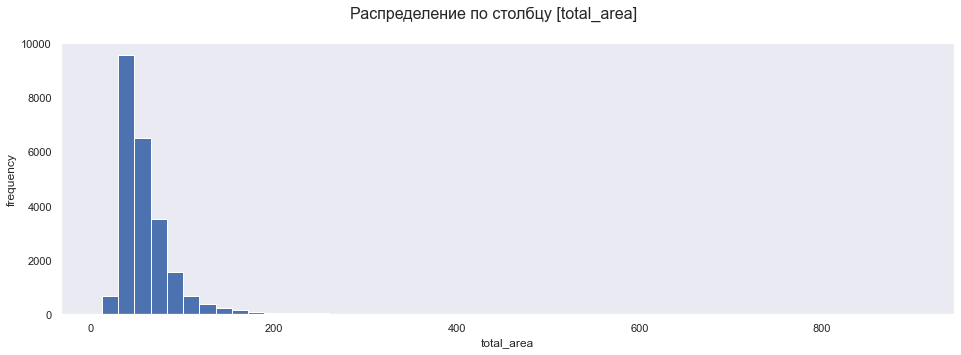

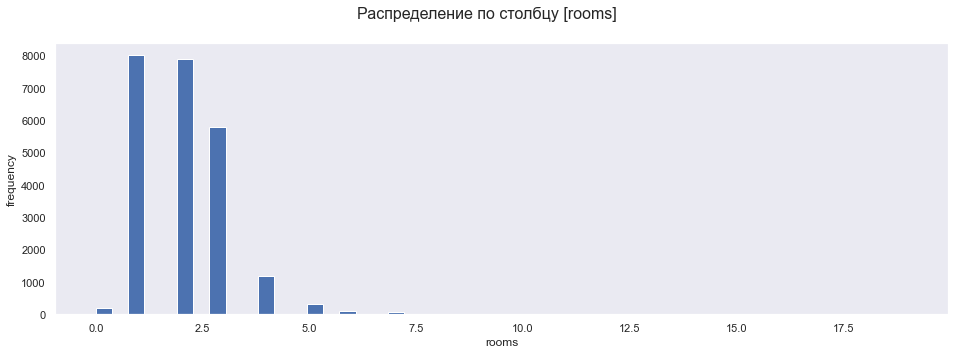

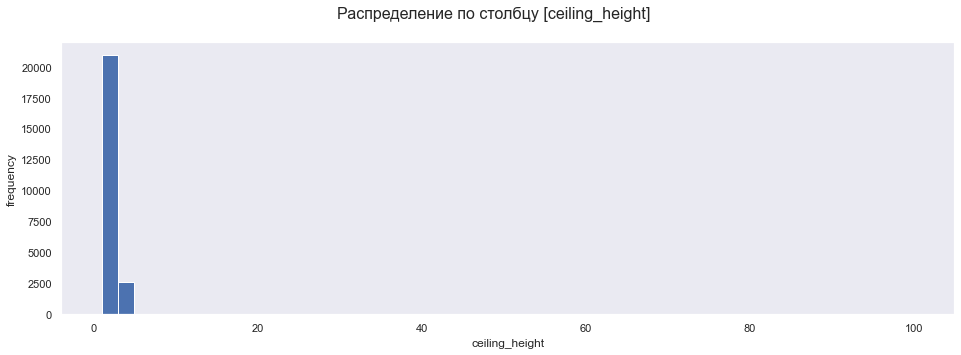

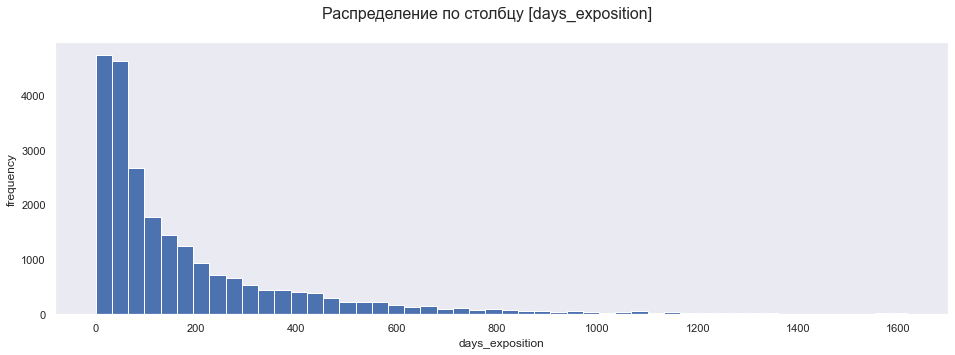

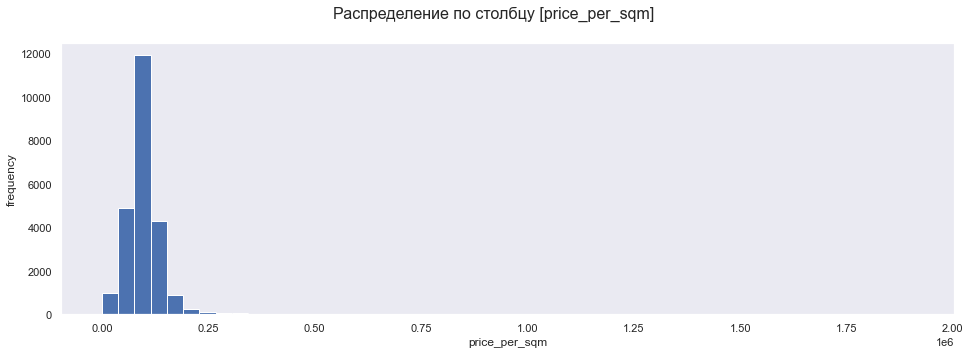

In [32]:
for i in df[['total_area', 'rooms', 'ceiling_height', 'days_exposition', 'price_per_sqm']]:
    column_visible_first(df, i, 50, 'Распределение по столбцу', i, 'frequency')

Видим, что все гистограммы, за исключением данных о высоте потолков, имеют длинный правый хвост, что говорит о положительной ассиметрии.

### Изучение времени продаж квартир.

Изучим время продажи квартир. Ознакомимся с оснонвными характеристиками с помощью метода `describe()`:

In [33]:
df['days_exposition'].describe()

count   23,565.00
mean       185.76
std        233.49
min          0.00
25%         43.00
50%         94.00
75%        237.00
max      1,618.00
Name: days_exposition, dtype: float64

Медиана (94) и среднее значение (185) очень сильно отличаются друг от друга. Стандартное отклонение также очень далеко от 0.

Построим еще раз гистограмму для данных о количестве дней публикации объявлений, а также диаграмму размаха:

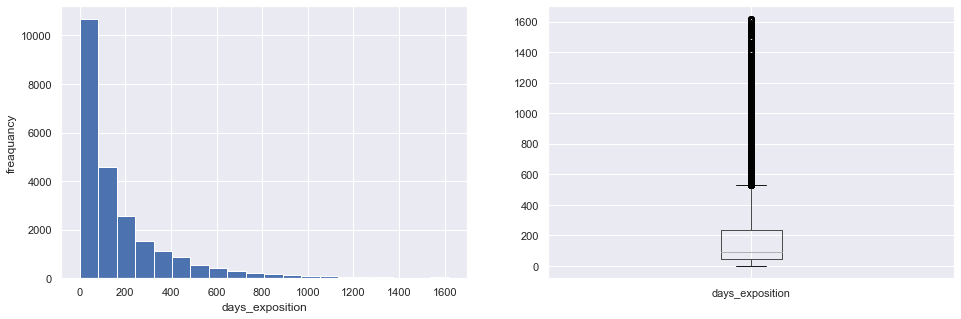

In [34]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.hist(df['days_exposition'], bins=20)
plt.xlabel('days_exposition') # название оси x
plt.ylabel('freaquancy')
plt.subplot(1, 2, 2)
df.boxplot(['days_exposition'])
plt.show()

Гистограмма подтверждает положительную ассимметрию данных, а на диаграмме размаха мы видим большое количество выбросов - необычайно длинных продаж - что также говорит о том, что в выборке много значений, превышающих медианное.   
Определим в каких случаях можем говорить о быстрых продажах, а в каких - о длинных. Предположим, что значения расположенные в нижнем усе, - это необычайно быстрые продажи, т.е. в 75% остальыных случаях требовалось больше времени, чтобы снять объявление с публикации. Долгими продажами будем считать те, что находятся в верхнем усе (75% остальных объявлений закрывалось быстрее). 
Для этого определим квартили 25% (Q1) и 75% (Q3), межквартильный размах(IQR) и вверхние и нижние границы усов (upper_tail, lower_tail):

In [35]:
q1 = df['days_exposition'].quantile(0.25)
q3 = df['days_exposition'].quantile(0.75) 
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
print(f'Первый квартиль: {q1}, нижняя граница уса: {lower_tail}')
print(f'Третий квартиль: {q3}, верхняя граница уса: {upper_tail}')

Первый квартиль: 43.0, нижняя граница уса: -248.0
Третий квартиль: 237.0, верхняя граница уса: 528.0


Таким образом, быстрыми продажами можно считать те объявления, которые были сняты с публикации в течение 43 дней с момента первого размещения. Долгие продажи - это продажи более 237 дней, при этом объявления опубликованные более 528 дней являются аномально долгими (выбросами).

### Удаление аномальных данных (выбросов)

Определим и удалим выбросы в столбцах *total_area*, *rooms*, *ceiling_height*, *days_exposition*, *price_per_sqm*.    
Для начала пройдёмся циклом по данным столбцам и построим для каждого диаграмму размаха. Выбросами будем считать все те значения, что находятся за пределами межквартильного размаха, т.е. за пределами "усов" графика:

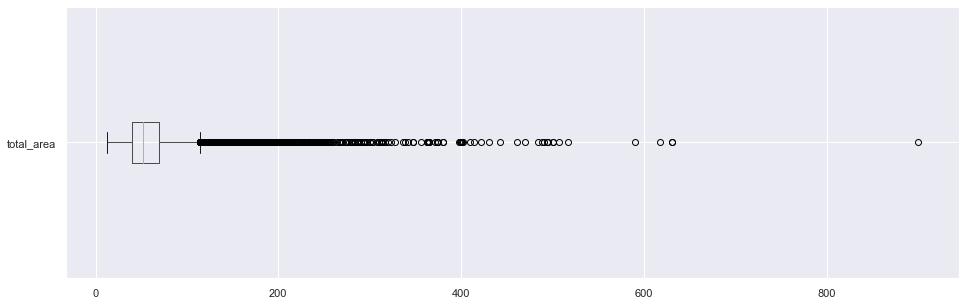

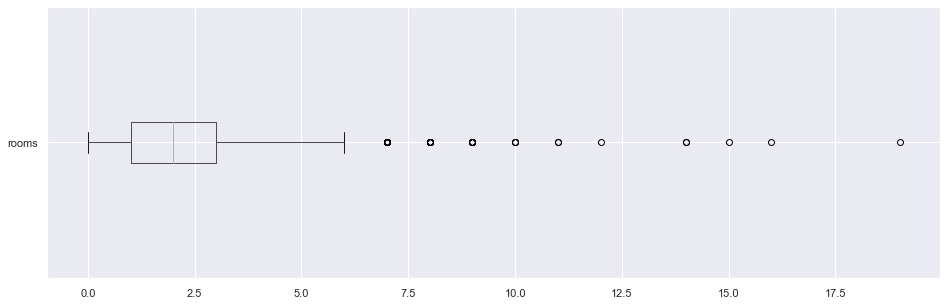

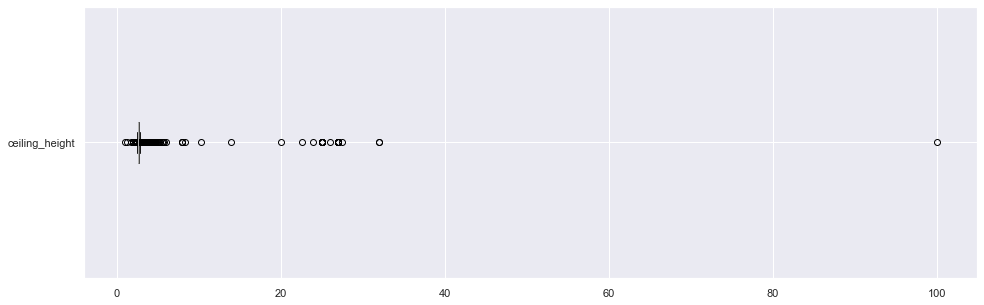

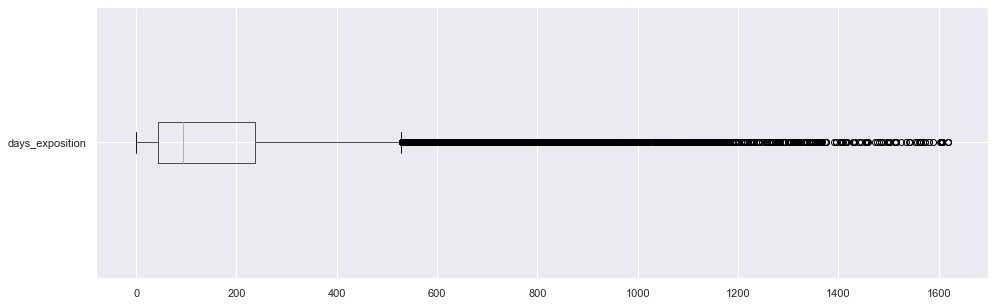

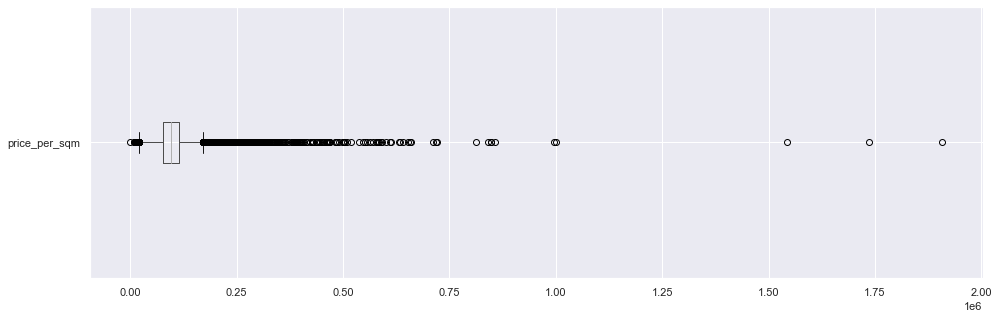

In [36]:
for cols in df[['total_area', 'rooms', 'ceiling_height', 'days_exposition', 'price_per_sqm']]:
    plt.figure(figsize=(16,5))
    df.boxplot([cols], vert=False)

Видим, что во всех анализируемых столбцах имеются выбросы, т.е. значения, находящиеся за пределами "усов" на графиках. 

Удалим выбросы - данные, находящиеся за пределами значения 1,5 межквартильного размаха: 

In [37]:
# Создадим цикл, который будет проходиться по колонкам датасета. Если колонка будет соответствовать одой из 
# анализируемых, то рассчитаем первый (q1) и третьий (q3), а также межквартильный размах (iqr) и границы (lower,
# upper). Далее с помощью query() определим данные, которые находятся в границах. 
# Рзультат запишем в переменной df.

print(f'Строк в датафрейме до удаления выбросов: {len(df)}')
for i in df.columns:
    if i == 'total_area' or i == 'rooms' or i == 'ceiling_height' or i == 'days_exposition' or i == 'price_per_sqm':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df = df.query('(@q1 - 1.5 * @iqr) <= {} <= (@q3 + 1.5 * @iqr)'.format(i))
print(f'Строк в датафрейме после удаления выбросов: {len(df)}')

Строк в датафрейме до удаления выбросов: 23565
Строк в датафрейме после удаления выбросов: 17734


Таким образом, порядка 5,8 тыс. данных были удалены из датафрейма как выбросы.   
Визуализируем полученные данные, очищенные от аномальных значений.

In [38]:
# Создадим функцию с переменными df, column, suptitle, xlabel, ylabel

def column_visible(df, column, bins, suptitle, xlabel, ylabel):

    plt.figure(figsize=(16,5)) # размер фигуры
    plt.suptitle(suptitle + ' [' + column + ']', fontsize=16) # название фигуры

    # первая фигура hist()
    plt.subplot(1, 2, 1) # выделим место в фигуре
    plt.hist(df[column], bins=bins)
    plt.xlabel(xlabel) # название оси x
    plt.ylabel(ylabel) # название оси y
    plt.grid(axis = 'both') # отображение сетки

    # вторая фигура boxplot()
    plt.subplot(1, 2, 2) # выделим место в фигуре
    plt.boxplot(df[column], vert=False)
    plt.xlabel(xlabel) # название оси x
    plt.grid(axis = 'both') # отображение сетки
    
    # вывод фигуры
    plt.show()

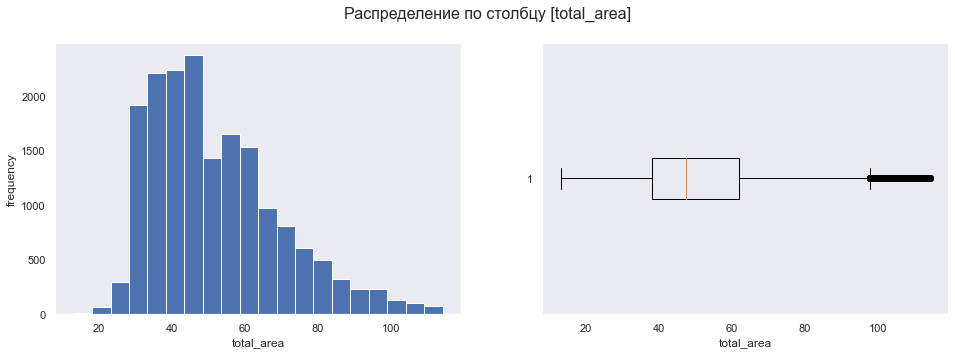

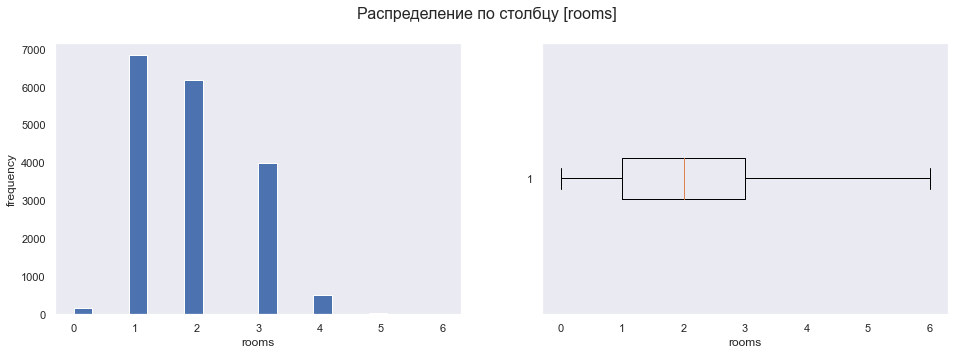

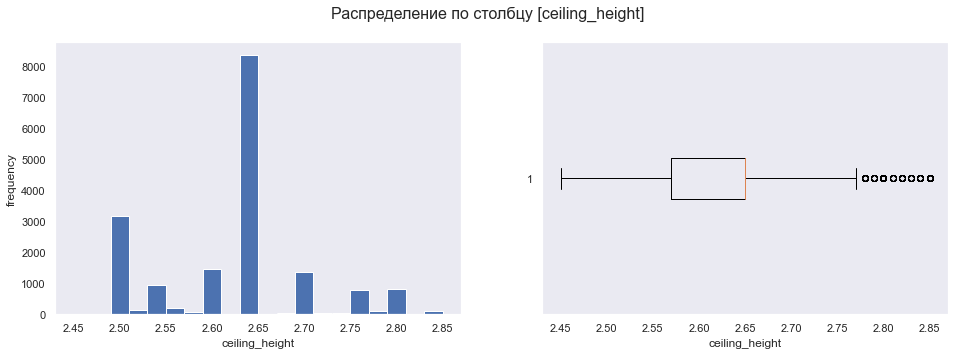

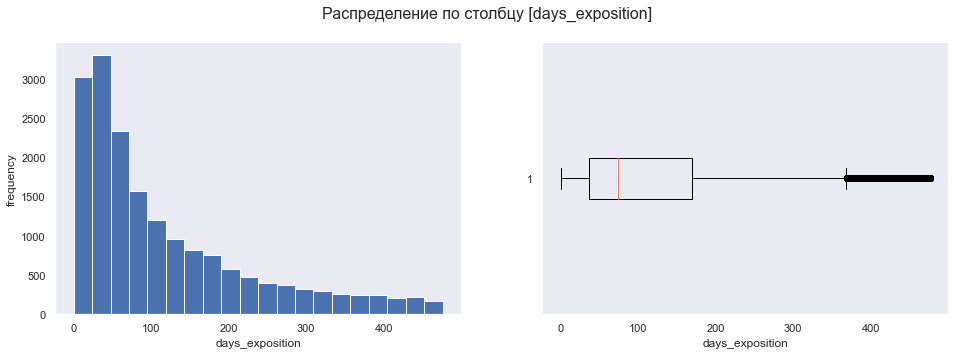

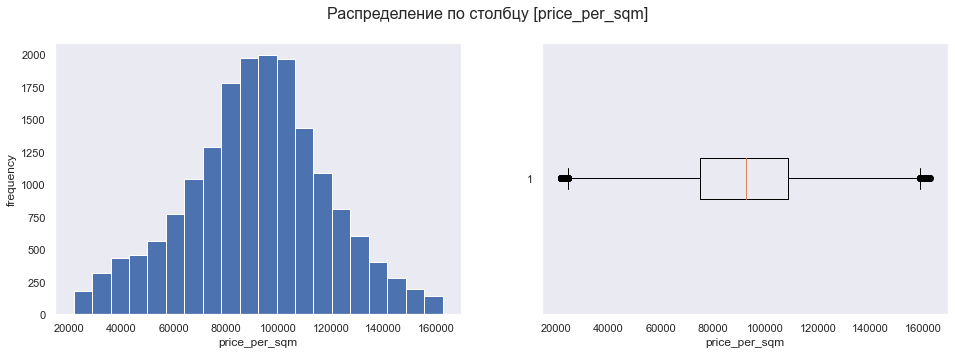

In [39]:
# Применим функцию column_visible к анализируемым столбцам с помощью цикла for

for i in df[['total_area', 'rooms', 'ceiling_height', 'days_exposition', 'price_per_sqm']]:
    column_visible(df, i, 20, 'Распределение по столбцу', i, 'frequency')

Как видим, по столбцам *total_area*, *ceiling_height*, *days_exposition*, *price_per_sqm* остались выбросы. Но, во-первых, их гораздо меньше, чем до очистки данных. Во-вторых, они очень близки к "усам". Кроме того, после удаления выбросов с помощью метода 1,5хIQR изменяются значения среднего и медианы, поэтому мы видим новые выбросы, которые не являлись выбросами до очистки.

Посмотрим насклько далеки выбросы от "усов" после очистки данных: 

In [40]:
# Создадим функцию, которая будет рассчитывать значения границ "усов", по сути повторяя то, что мы делали для очистики
def iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75) 
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    return lower_tail, upper_tail

In [41]:
# Применим функцию к анализируемым столбцам:

for i in df:
    if i == 'total_area':
        print('total area tails:', iqr(df, i)) # выведим границы 1,5 межквартильного размаха для столбца на экран
        print('total area max:', df['total_area'].max()) # выведим максимальное значение в столбце на экран
    elif i == 'rooms':
        print('rooms tails:', iqr(df, i))
        print('rooms max:', df['rooms'].max())
    elif i == 'ceiling_height':
        print('ceiling_height tails:', iqr(df, i))
        print('ceiling_height max:', df['ceiling_height'].max())
    elif i == 'days_exposition':
        print('days_exposition tails', iqr(df, i))
        print('days_exposition max:', df['days_exposition'].max())
    elif i == 'price_per_sqm':
        print('price_per_sqm tails', iqr(df, i))
        print('price_per_sqm max:', df['price_per_sqm'].max())

total area tails: (2.250000000000007, 97.85)
total area max: 114.2
rooms tails: (-2.0, 6.0)
rooms max: 6
ceiling_height tails: (2.4499999999999997, 2.77)
ceiling_height max: 2.85
days_exposition tails (-163.5, 368.5)
days_exposition max: 476.0
price_per_sqm tails (24674.83479617785, 158832.68274711102)
price_per_sqm max: 162460.56782334385


Учитывая полученные результаты, новые выбросы после очистки датасета по данным общей площади находятся в пределах от 97.85 до 113.2, по высоте потолков - от 2.77 до 2.85, по дням отображения объявления - от 368 до 476, по цене за кв.м - от 158 тыс. до 162 тыс. Понимая, что новые выбросы появились из-за изменения медианных значений после очиски, оставим указанные данные и не будем делать еще несколько итераций очистки, добиваясь полного отсутствия выбросов.

В результате, датасет был очищен от аномальных значений.

### Изучим факторы, влияющие на стоимость квартир

Определим есть ли зависимость между ценой от площади, числа комнат, удалённости от центра. Применим метод corr():

In [42]:
print(df[['price_per_sqm', 'total_area', 'rooms', 'city_center_nearest']].corr())

                     price_per_sqm  total_area  rooms  city_center_nearest
price_per_sqm                 1.00       -0.02  -0.20                -0.18
total_area                   -0.02        1.00   0.80                -0.07
rooms                        -0.20        0.80   1.00                -0.04
city_center_nearest          -0.18       -0.07  -0.04                 1.00


Цена за квадратный метр практически не имеет корреляции с показателями общей площади. С количеством комнат и близости к центру цена имеет слабую отрицательную корреляцию - при увеличении цены количество комнат и близость к центру будут меньше.
Визуализируем полученные данные с помощью диаграмм рассеивания:

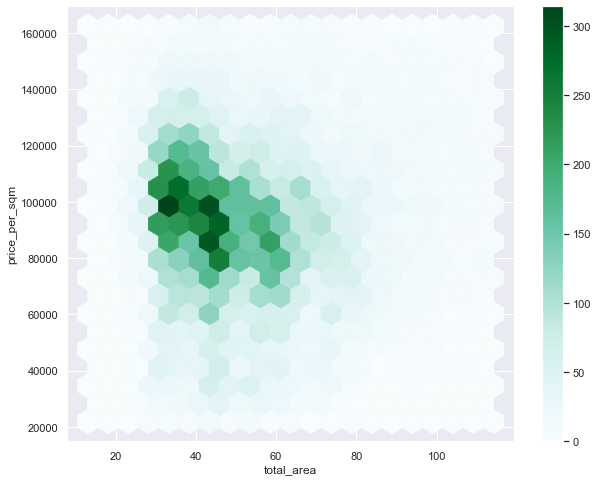

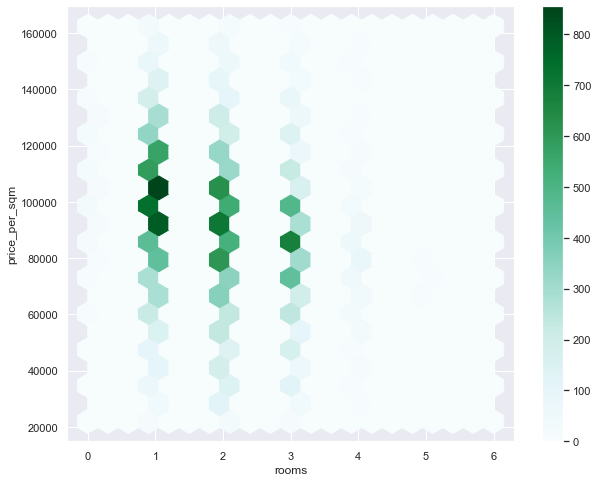

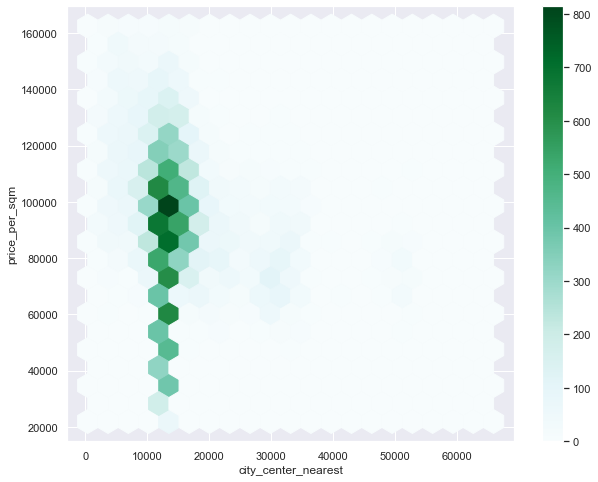

In [43]:
for cols in df[['total_area', 'rooms', 'city_center_nearest']]:
    plt.show()
    df.plot(kind='hexbin', x=cols, y='price_per_sqm', figsize=(10, 8), gridsize=20, sharex=False, grid=True)

Можно утверждать, что чем больше плоащдт квартиры, то тем меньше цена за кв.м. При этом, однако, видно, что за одну и ту же площадь количество объявлений с разной ценой за кв.м. может быть примерно одинаковым. Так, объявлений по квартирам с площадью 40 - 50 кв.м. за 80 тыс. руб. за кв.м. примерно также много как объявлений по аналогичным квартирам за 100 тыс. руб. за кв.м.
Также можно утверждать, что чем меньше комнат, то тем выше цена за кв.м, что подтверждает отрицательную корреляцию между этими данными.
Немного странным выглядит диаграмма по близости к центру - корреляция видна только на одном отрезке длины до центра. Возможно это связно с тем, что отсутстующие данные были заполнены медианой. Методом `value_counts` посчитаем какие значения имеются в указанном столбце:

In [44]:
df['city_center_nearest'].value_counts()

13,101.00    4470
21,888.00      30
12,244.50      27
34,085.00      24
20,444.00      22
             ... 
5,473.00        1
8,366.00        1
3,441.00        1
21,377.00       1
6,263.00        1
Name: city_center_nearest, Length: 5911, dtype: int64

Как видим, в данных очень значительно больше чем всех остальных значения 13 101 км до центра. Сделаем срез данных, исключив указанное значение, и посмотрим как распределяется корреляция:

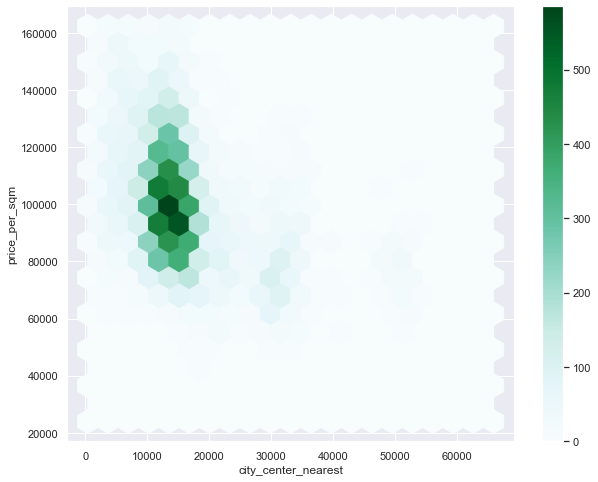

In [45]:
df_filtered = df.query('city_center_nearest != 13101.0').plot(kind='hexbin', x=cols, y='price_per_sqm', figsize=(10, 8), gridsize=20, sharex=False, grid=True)

Как видим, большая часть объявлений в отношении квартир с удалённостью 10 000 - 20 000 метров, стоимостью за кв.м. 80 - 120 тыс. руб. Чем дальше от центра, тем цена за кв. м. ниже, но эта корреляция не сильно выражена на графике.

С помощью диаграммы размаха изучим зависимость цены от этажа, на котором расположена квартира:

<AxesSubplot:title={'center':'price_per_sqm'}, xlabel='floor_type'>

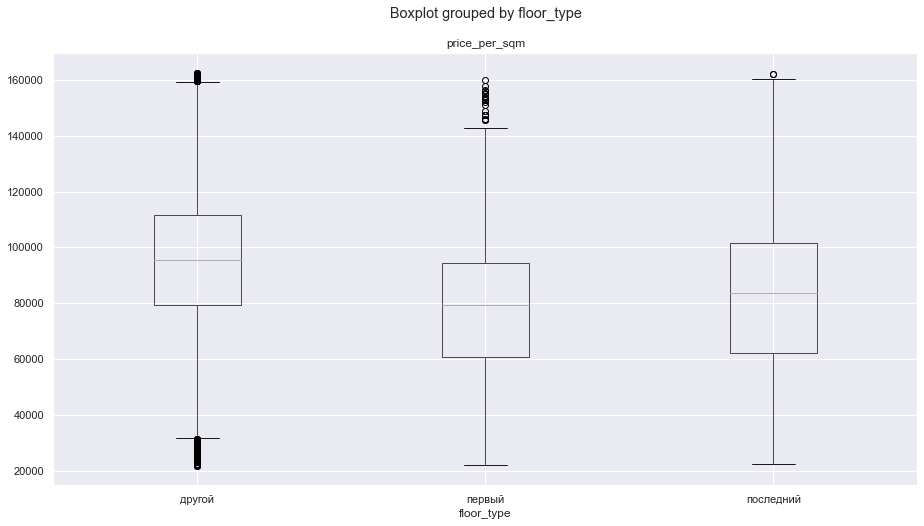

In [47]:
df.boxplot(column='price_per_sqm', by='floor_type')

Следовательно, медианная цена на первых и последних этажах гораздо ниже (~ 80 тыс. руб./кв.м.), чем на других этажах (~95 тыс.руб./кв.м.).   
Только 25% квартир на других этажах дешевле 80 тыс. руб./кв. м., однако на первых и последних этажах 25% квартир дешевле 60 тыс. руб./кв. м.   
При этом только 25% цен в объявленях по квартирам на первых и последних этажах больше 90 тыс. руб. и 100 тыс. руб. соответственно. В то время как на других этажах 25% квартир продаётся по цене от 110 тыс. руб.

Проанализируем менялась ли цена по годам. Но для начала посмотрим сколько объявлений за каждый год у нас имеется:

In [48]:
df.pivot_table(index='year', values='price_per_sqm', aggfunc=['median', 'count', 'mean'])

,median,count,mean
,price_per_sqm,price_per_sqm,price_per_sqm
year,,,
2015,"89,156.63",345,"88,415.64"
2016,"89,393.94",1689,"89,405.48"
2017,"89,764.26",6354,"89,750.84"
2018,"93,437.50",7031,"91,540.56"
2019,"100,732.60",2315,"98,210.44"


Таким образом, данных за 2016 и 2017 годы гораздо больше, чем за остальные. При этом за 2015 г. данных совсем мало по отношению к другим годам, удалим их с помощью метода `query()`. Будем учитывать это при дальнейшем анализе.    
Построим график *lineplot*, который по оси *х* будет отображать год, а по оси *у* - цену за кв.м.

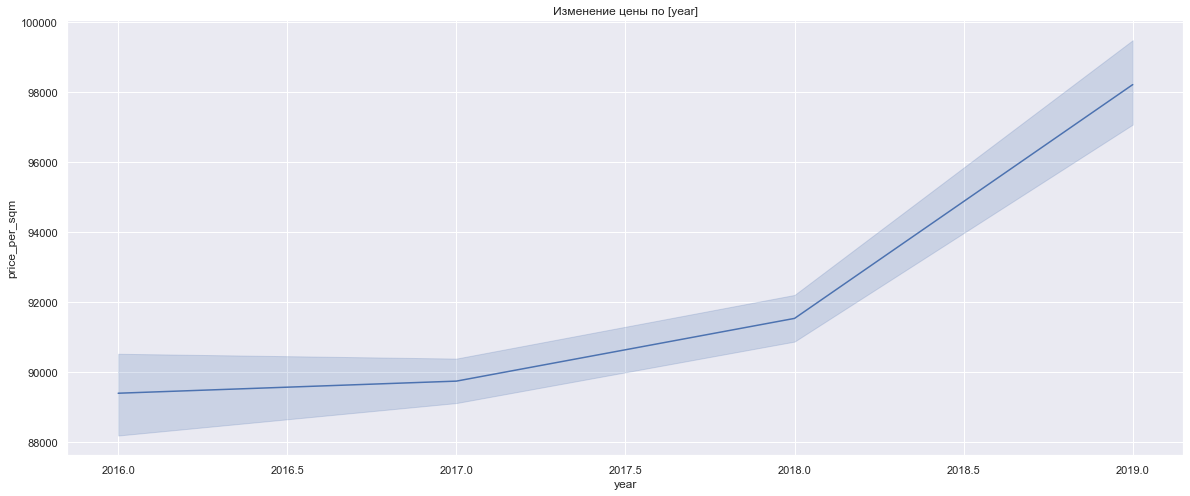

In [49]:
# Удалим из датасета данные за 2015 г.
df = df.query('year != 2015')

# Содадим функцию для вывода графика lineplot
def price_per_date(df, column):
    plt.figure(figsize=(20, 8))
    plt.title('Изменение цены по' + ' [' + column + ']')
    sns.lineplot(data=df, x=column, y='price_per_sqm')
    plt.show()
    
# Выведим изменение цены по годам    
price_per_date(df, 'year')

В соответствии с графиком цена за кв.м. росла каждый год. В 2019 г. наблюдался максимальный рост, но, возможно, что это сязано со структурой данных - показаний за 2019 г. не так много как за 2017 и 2018 гг. - и рост был не таким большим.

Построим аналогичный график для месяцев, в которых были опубликованы объявления:

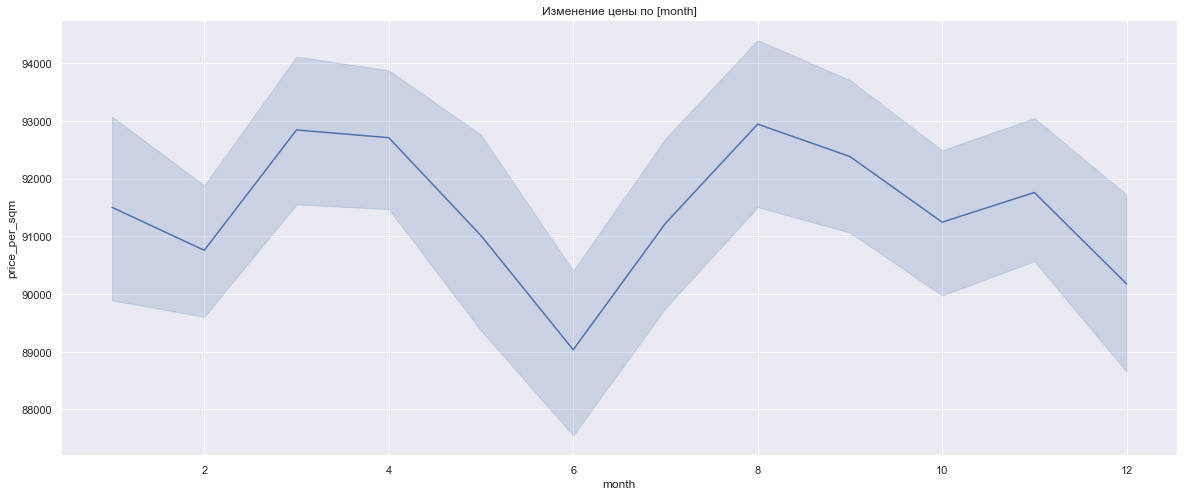

In [50]:
price_per_date(df, 'month')

Можно утверждать, что максимальные цены наблюдаются по объявлениям, опубликованным с марта по май и с августа по сентябрь. В летние месяцы наблюдается спад цен, пик которого приходится на июнь. Также спад цен приходится на ноябрь - декабрь, но в эти месяцы спад не такой большой, как летом.

Построим график также и для дней месяца:

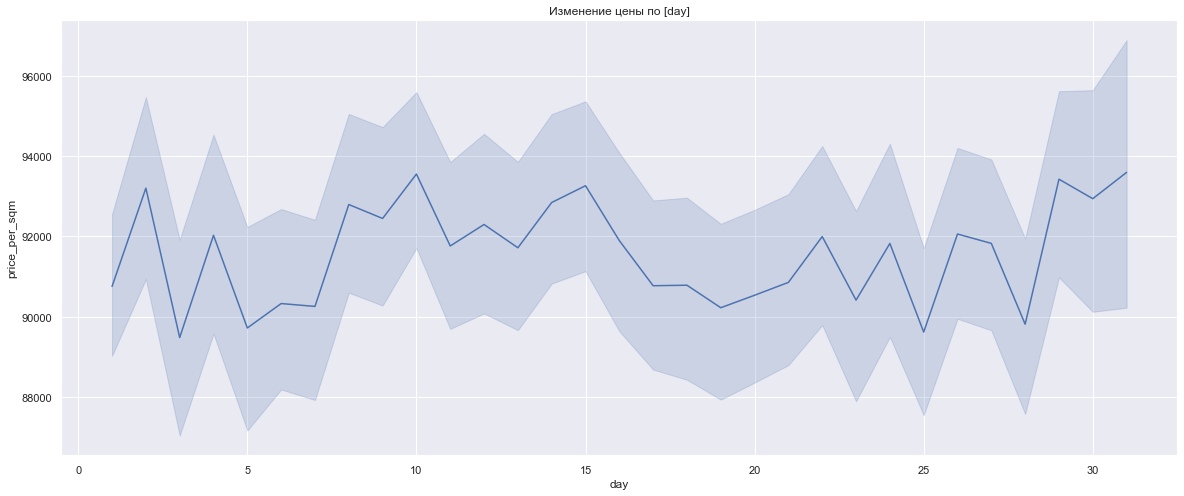

In [51]:
price_per_date(df, 'day')

Как видим, максимальная средняя цена за кв.м. приходится на объяаления, опубликованные в середине и конце месяца.

Мы установили зависимость цены кв.м. от различных показателей:
* Убедились, что нет сильной корреляции между ценой и общей плоащдью, количеством комнат и близости к центру. При этом с этими данными цена имеет отрицательную корреляцию,что вполне логично;
* Цены на квартиры на первых и на последних этажах ниже, чем на квартиры на других этажах;
* С 2016 г. по 2019 г. наблюдается рост цен на жильё

### Анализ цены за кв.м. по населённым пунктам

С помощью сводной таблицы сгруппируем данные по населённым пунктам, посчитав количество объявлений и среднюю цену за квадратный метр. Далее выведем на экран топ-10 населённых пунктов по количество объявлений, по максимальному и минимальному среднему значению руб./кв.м.:

In [52]:
locality_ppsm = df.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=('mean', 'count'))
display('Топ-10 по количеству объявлений:')
display(locality_ppsm.sort_values(by='count', ascending=False).head(10))
display('Топ-10 по максимальной средней цене:')
display(locality_ppsm.sort_values(by='mean', ascending=False).head(10))
display('Топ-10 по минимальной средней цене:')
display(locality_ppsm.sort_values(by='mean', ascending=False).tail(10))

'Топ-10 по количеству объявлений:'

,count,mean
locality_name,,
Санкт-Петербург,10909,"104,403.21"
посёлок Мурино,477,"85,898.62"
посёлок Шушары,402,"78,486.63"
Всеволожск,329,"66,924.04"
посёлок Парголово,303,"89,883.70"
Колпино,291,"75,609.14"
Пушкин,263,"100,488.11"
деревня Кудрово,256,"92,699.78"
Гатчина,248,"69,166.42"


'Топ-10 по максимальной средней цене:'

,count,mean
locality_name,,
Санкт-Петербург,10909,"104,403.21"
Сестрорецк,124,"102,763.33"
Зеленогорск,18,"100,618.96"
Пушкин,263,"100,488.11"
деревня Мистолово,10,"100,331.47"
Кудрово,165,"99,980.78"
посёлок Левашово,1,"96,997.69"
посёлок Репино,1,"92,727.27"
Мурино,34,"92,722.71"


'Топ-10 по минимальной средней цене:'

,count,mean
locality_name,,
поселок Красная Долина,2,"24,120.88"
поселок Торковичи,1,"23,719.17"
городской посёлок Лесогорский,1,"23,437.50"
деревня Коркино,1,"22,950.82"
деревня Пижма,1,"22,641.51"
деревня Куровицы,1,"22,593.32"
садоводческое некоммерческое товарищество Лесная Поляна,1,"22,580.65"
Пикалёво,2,"22,465.27"
посёлок Алексеевка,1,"22,222.22"


Подавляющее количество объявлений в датасете по Санкт-Петербургу, в нём же и максимальная средняя цена за кв.м.

### Изучение объявлений по объектам в центре Санкт-Петербурга

Изучим предложения в Санкт-Петербурге в зависимости от расстояния для центра. Для этого создадим новый столбец *city_center_km*, в котором сохраним округлённые до километров данные из столбца *city_center_nearest*, разделив их на тысячу и применив методы `round()` и `astype()`:

In [53]:
df['city_center_km'] = (df['city_center_nearest'] / 1000.0).round().astype(int)
print(df['city_center_km'].head())

0    16
1    19
5    13
6    19
7    12
Name: city_center_km, dtype: int32


В переменной df_spb сохраним данные по объявлениям квартир, находящихся в Санкт-Петербурге. Затем с помощью сводной таблицы выведем на экран инфорамцию о средней стоимости кв.м. для каждого км удалённости от центра и количестве объявлений:

In [54]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
display(df_spb.pivot_table(index='city_center_km', values='price_per_sqm', aggfunc=('mean', 'count')))

,count,mean
city_center_km,,
0,2,"99,081.63"
1,40,"114,512.68"
2,66,"113,976.13"
3,96,"111,652.73"
4,203,"115,173.06"
5,253,"117,624.68"
6,246,"120,545.03"
7,188,"119,574.73"
8,306,"113,894.39"


Чем ближе и дальше к центру, тем меньше объявлений. Построим график, чтобы понять на какой удалённости от центра сильно меняется цена:

<AxesSubplot:xlabel='city_center_km', ylabel='price_per_sqm'>

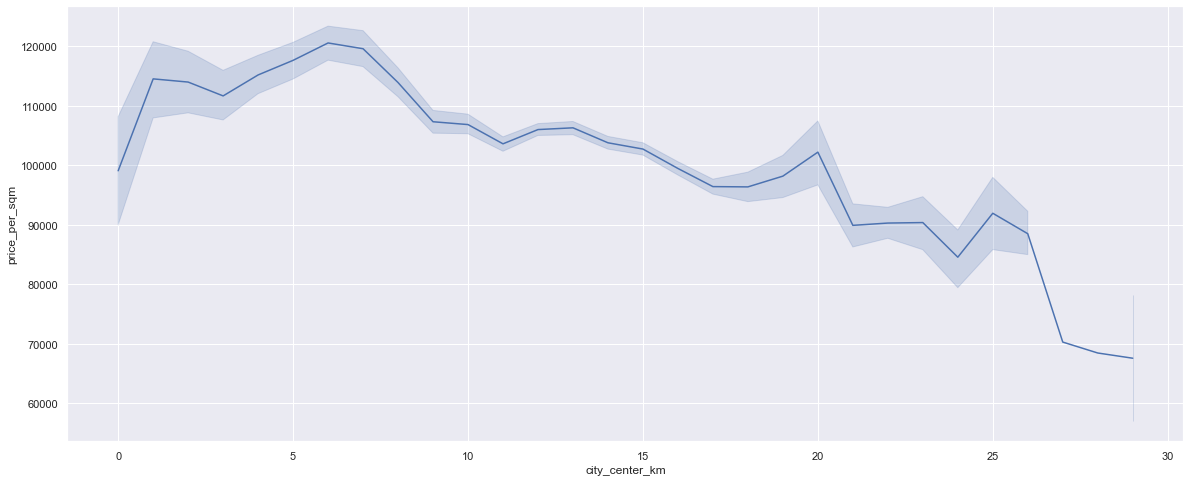

In [55]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_spb, x='city_center_km', y='price_per_sqm')

Как видим, ориентировочно с после 7 км от центра сильно падает цена за кв.м. Это подтверждает и сводная таблица: если на удалённости 7 км от центра средняя цена 119 тыс. руб., то на удалённости 8 км - уже 113 тыс. руб. и с удалением от центра она продолжает падать.

Изучим квартиры, расположенные в центре, т.е. в 7 километрах от центра. Сохраним в переменной df_spb_center данные в результате применения метода `query()` для объявлений в центре:

In [56]:
df_spb_center = df_spb.query('0 <= city_center_km <= 7')

Изучим общие показатели данных об объявлениях в центре:

In [57]:
df_spb_center[['total_area', 'rooms', 'ceiling_height', 'days_exposition', 'price_per_sqm']].describe()

,total_area,rooms,ceiling_height,days_exposition,price_per_sqm
count,"1,094.00","1,094.00","1,094.00","1,094.00","1,094.00"
mean,64.98,2.26,2.66,125.45,"117,269.71"
std,22.17,0.95,0.07,111.67,"23,258.40"
min,13.20,0.00,2.46,0.00,"26,250.00"
25%,46.42,2.00,2.65,39.00,"99,955.88"
50%,62.40,2.00,2.65,90.00,"116,260.40"
75%,82.19,3.00,2.65,183.00,"135,483.87"
max,114.20,6.00,2.85,474.00,"162,300.32"


Визуализируем данные с помощью уже применённой функции column_visible, которая выведет гистограммы и диаграммы размаха:

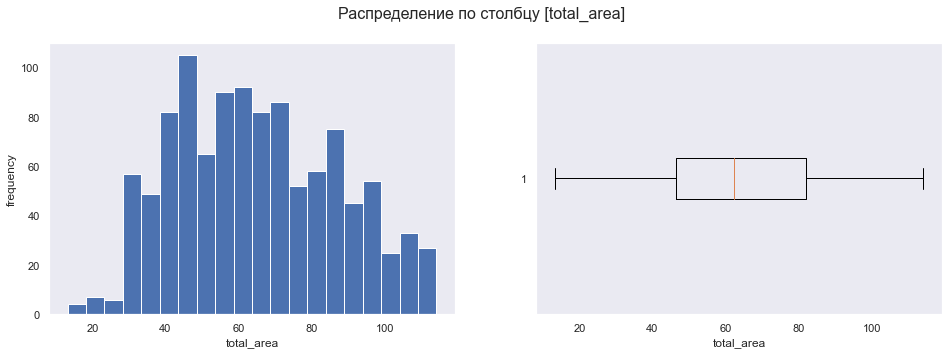

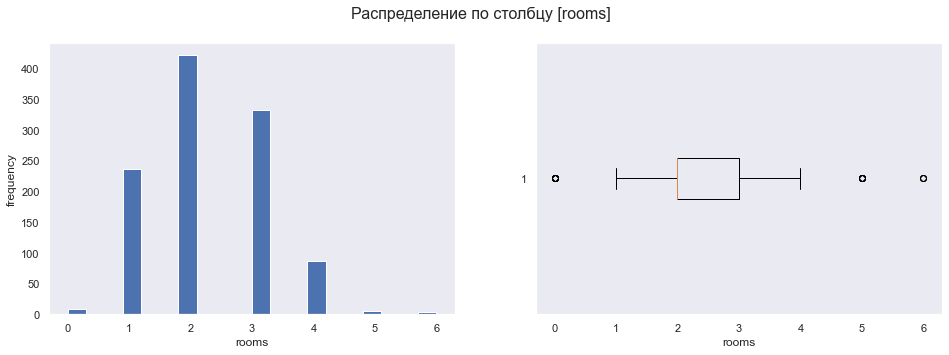

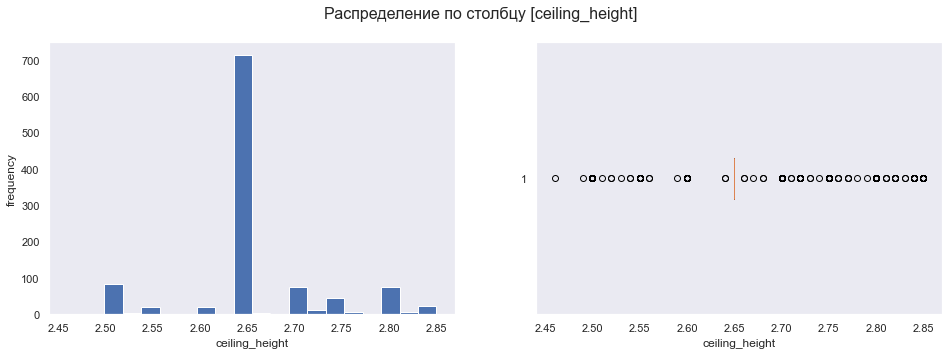

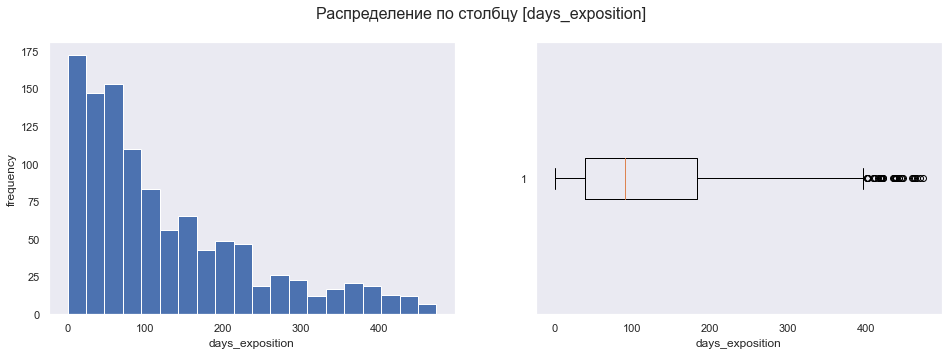

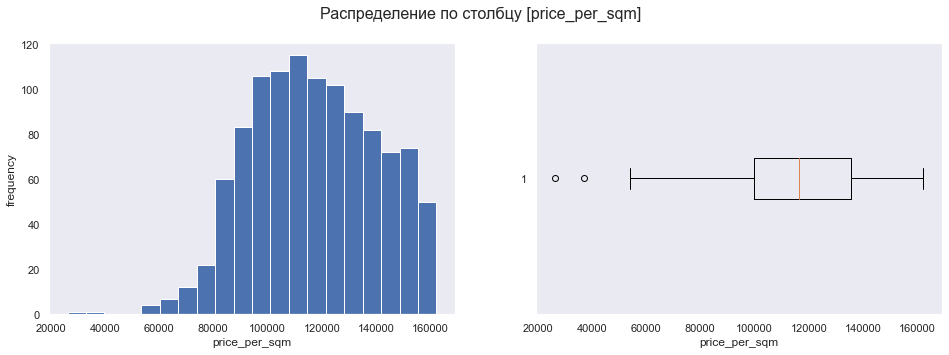

In [59]:
for i in df_spb_center[['total_area', 'rooms', 'ceiling_height', 'days_exposition', 'price_per_sqm']]:
    column_visible(df_spb_center, i, 20, 'Распределение по столбцу', i, 'frequency')

Таким образом, по квартирам в центре можно сделать следующие выводы:
* площадь квартир редко бывает больше 80 кв.м. Медианное значение составляет 62 кв.м. Для объектов не в центре Санкт-Петербурга средняя площадь является меньше и в 75% не превышает 60 - 62 кв.м. 
* Медианное количество комнат в центре - 2, что аналогично и для объектов и в других частях. Квартиры с более 4 комнатами в центре являются аномальными. 
* Медианная цена за кв.м. - 116 тыс. руб., в то время как для остальных объектов медиана средней цены за кв.м. находится в районе 90 тыс. руб.
* высота потолков в объектах, расположенных в центре и в других частях, не отличается, и медианное значение составляет 2,65 м. 

Определим как быстро проадются квартиры в центре. Будем считать быстрыми все те продажи, что не меньше первого квартиля, а долгими - превышающие третий квартиль.

In [60]:
q1 = df_spb_center['days_exposition'].quantile(0.25)
q3 = df_spb_center['days_exposition'].quantile(0.75)  
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
print(f'Первый квартиль: {q1}, нижняя граница уса: {lower_tail}')
print(f'Третий квартиль: {q3}, верхняя граница уса: {upper_tail}')

Первый квартиль: 39.0, нижняя граница уса: -177.00000000000006
Третий квартиль: 183.00000000000003, верхняя граница уса: 399.0000000000001


Следовательно, продажи быстрее 39 дней являются быстрыми, а продажи дольше 183 дней и до 399 - долгими. Если объявление по объекту было опубликовано более 400 дней, то можно говорить об аномально долгих продажах.    
Сравнивая скорость продаж объектов0 в центре с остальными объектами можно отметить, что в центре объекты продаются быстрее, т.к. для остальных объектов долгими считаются продажи свыше 237 дней.

Изучим корреляцию общей площади и количества комнат с ценой за кв.м. в центре Санкт-Петербурга:

In [61]:
print(df_spb_center[['price_per_sqm', 'total_area', 'rooms']].corr())

               price_per_sqm  total_area  rooms
price_per_sqm           1.00       -0.23  -0.36
total_area             -0.23        1.00   0.78
rooms                  -0.36        0.78   1.00


Корреляция является негативной, т.е. при уменьшении цены увеличивается площадь объекта и кличество комнат. При этом корреляция более сильная, чем в целом для объектов в датасете.
Визуализируем этот вывод с диаграммой рассеивания:

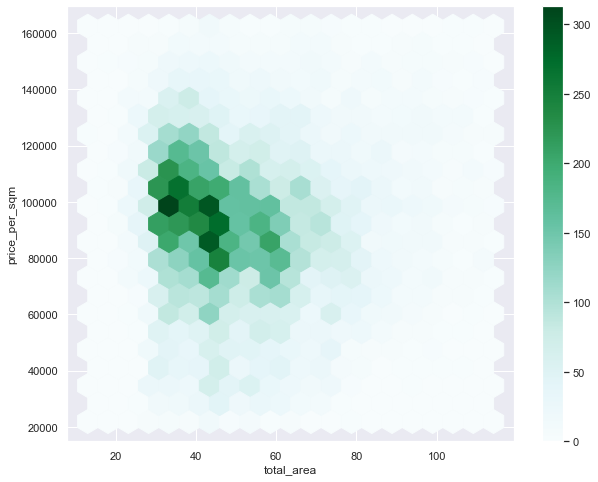

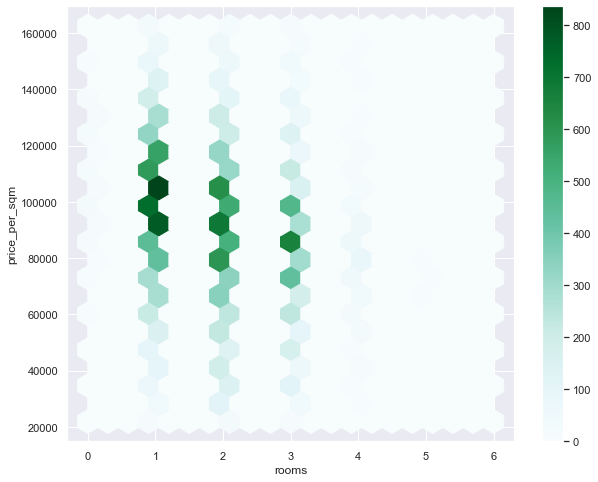

In [63]:
for cols in df_spb_center[['total_area', 'rooms']]:
    plt.show()
    df.plot(kind='hexbin', x=cols, y='price_per_sqm', figsize=(10, 8), gridsize=20, sharex=False, grid=True)

Графики подтверждают наш вывод: чем выше цена, тем меньше площадь и количество комнат.

Проанализируем влияет ли этаж на цену объекта в центре Санкт-Петербурга:

<AxesSubplot:title={'center':'price_per_sqm'}, xlabel='floor_type'>

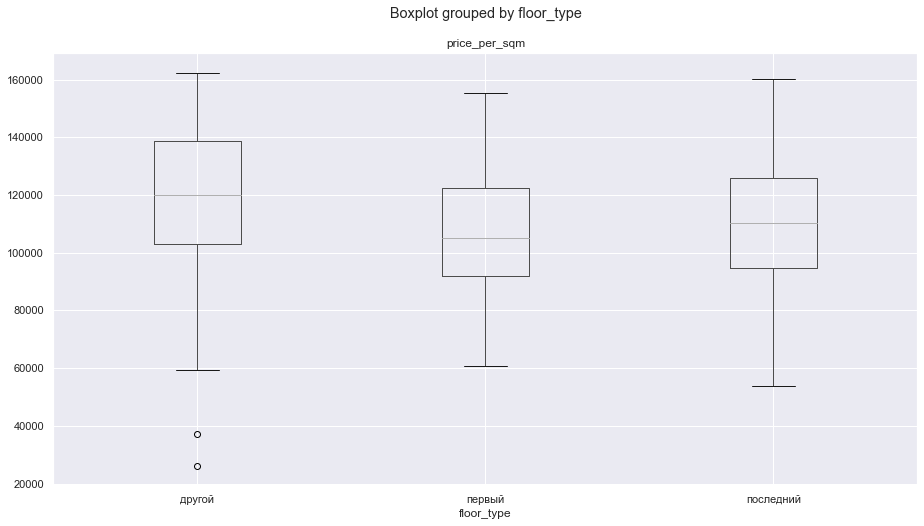

In [64]:
df_spb_center.boxplot(column='price_per_sqm', by='floor_type')

Как в случае и с объектами в остальных частях квартиры на первых и последних этажах стоят дешевле, чем на других этажах.

Построим графики изменения цены в зависимости от года, месяца и дня публикации объявления. Применим функцию *price_per_date*:

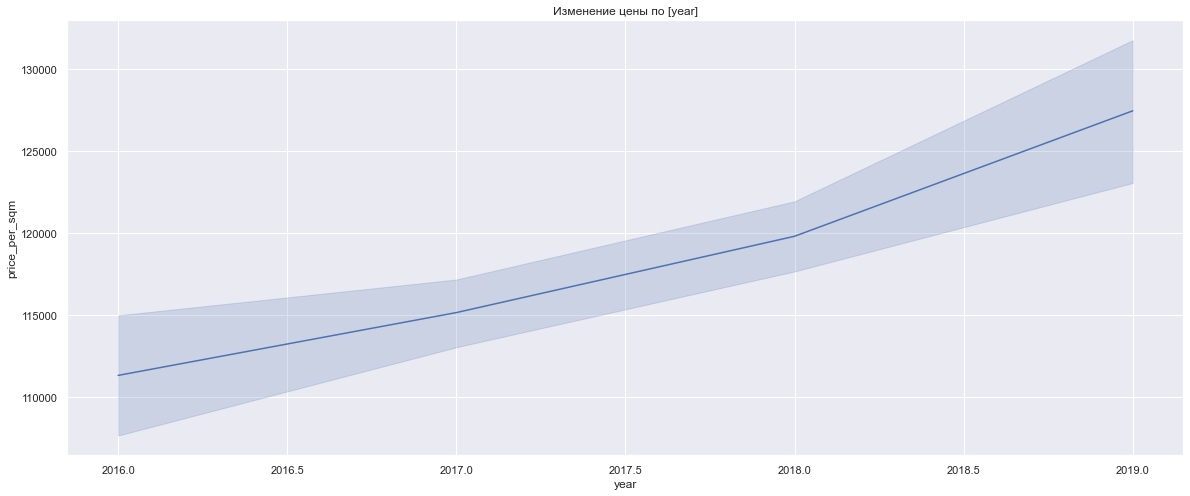

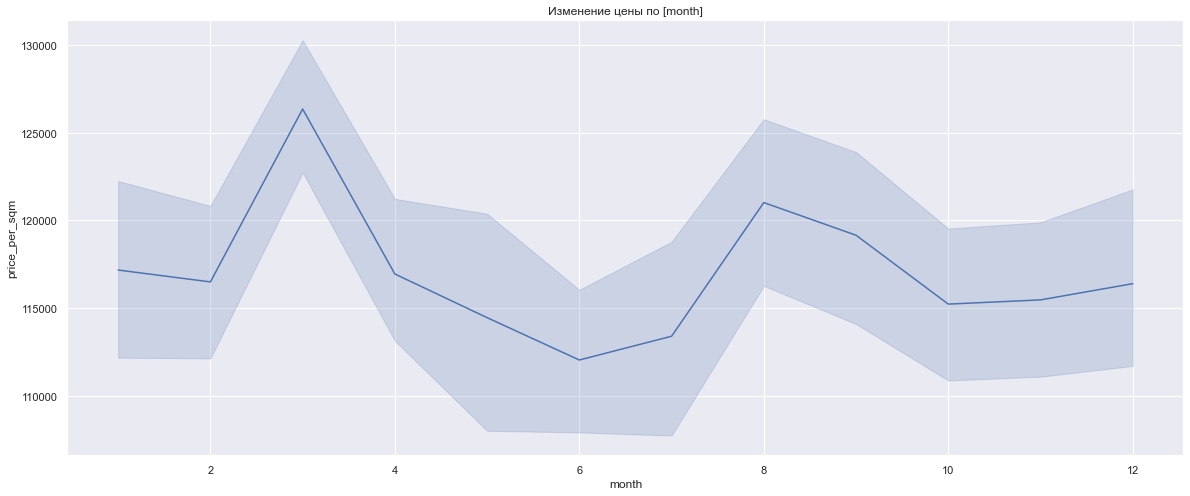

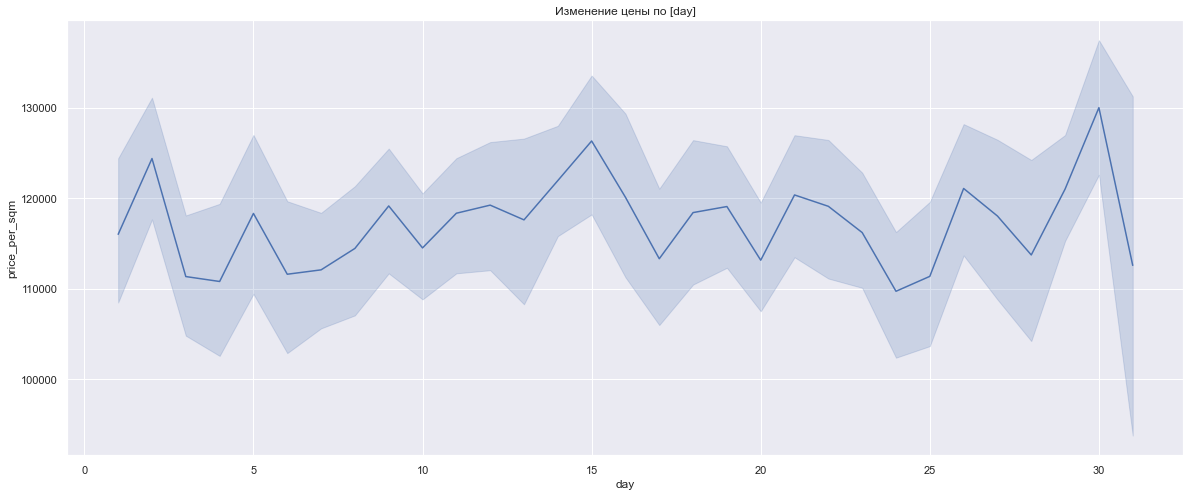

In [65]:
for i in df_spb_center[['year', 'month', 'day']]:
    price_per_date(df_spb_center, i)

Данные по изменению цены в разрезе года, месяца и дня публикации по центру Санкт-Петербурга в целом аналогичны данным по остальным объявлениям: цены росли каждый год, летом и зимой наблюдается спад цен, самые высокие цены в объявлениях, опубликованных в середине и конце месяца.

По результатам сравнения влияния факторов на продажу объектов в центре Санкт-Петербурга и по остальным объекам можно сделать следующие выводы:
* и объектам в центре Санкт-Петербурга, и по остальным объектам наблюдается корреляция между ценой за кв.м. и количеством комнат, общей площади и этаже, на котором расположен объект: чем больше площадь и количество комнат, тем меньше цена за кв.м., а если этаж не первый и не последний, то цена выше;
* цена за кв.м. в центре Санкт-Петербурга так же росла из года в год, как и по объектам в остальных частях. Общим являением также является спад цены за кв.м. летом и зимой. 

## Общий вывод

По результатам проведённого анализа можно сделать следующие выводы:
* в объявлениях для объектов в центре Санкт-Петербурга по сравнению с остальными объявлениями выше средняя цена за кв.м. и средняя общая площадь объектов;
* среднее количество комнат и высота потолков объектов в центре и в остальных частях не отличаются;
* объекты в центре продаются быстрее, чем остальные объекты;
* средняя цена как для объявлений в центре Санкт-Петербурга, так и для остальных объявлений имеет негативную корреляцию с общей площадью и количеством комнат. Также имеется взаимосвязь между этажом и ценой за кв.м.: объекты на первых и последних этажах как правило дешевле, чем объекты на остальных этажах. 